In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

In [70]:
#load template
layout = pd.read_csv("london-tile-grid-map-template.csv")
data = pd.read_excel("prop_cycling_once_per_week.xlsx")

In [78]:
df = pd.merge(data, layout, left_on="Geography code", right_on=["Code"], how='inner')

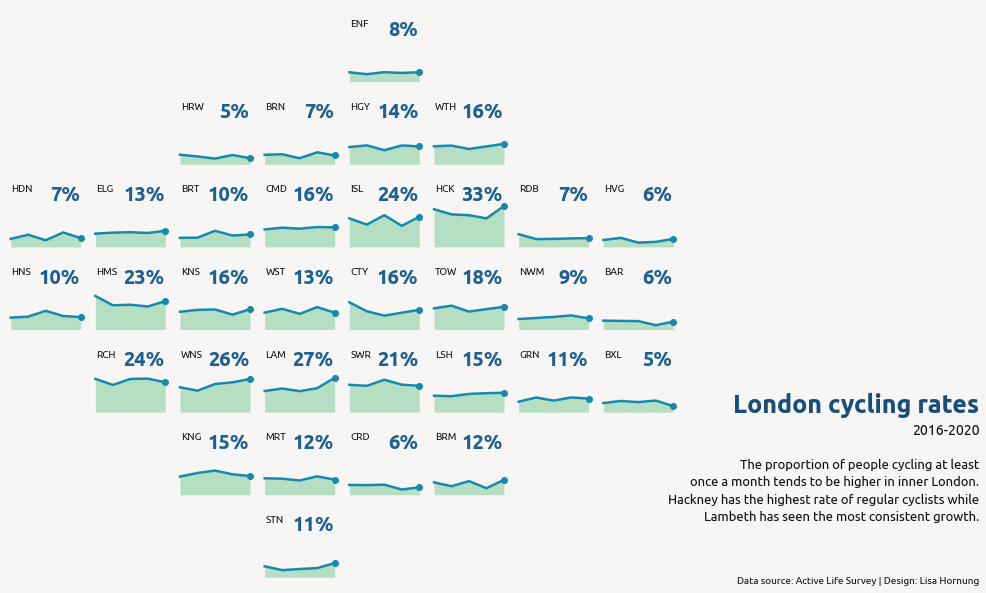

In [289]:
# =======
# set colors and fonts
colors = {"line": "#168aad", "area": "#76c893", "value": "#1e6091", "title":"#184e77"}
#"area": "#76c893"
#"line": "#34a0a4"
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-B.ttf')
annot_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-SemiBold.ttf')

main_title="London cycling rates"
subtitle = "2016-2020"
legend = "Proportion of people cycling\nat least once a month"
source="Data source: Active Life Survey | Design: Lisa Hornung"
#paragraph = "Cycling rates tend to be higher in inner London.\nHackney has the highest rate of regular cyclists while\nLambeth has seen the most consistent growth."
paragraph = "The proportion of people cycling at least\nonce a month tends to be higher in inner London.\nHackney has the highest rate of regular cyclists while\nLambeth has seen the most consistent growth."

# =========
# Initialise Figure and define layout
#8,7 | 10, 8.75
fig,ax = plt.subplots(7,8,figsize=(12,10.5), sharey=True)

fig.set_facecolor("#f7f6f4")
plt.subplots_adjust(wspace=0.1, hspace=0.1)

#Format grid layout - remove frame + axis labels
for a in ax:
    for i in a:
        i.get_xaxis().set_visible(False)
        i.get_yaxis().set_visible(False)
        i.set_ylim(ymax=60, ymin=0)   
        i.axis('off')
        for pos in ["top", "bottom", "right", "left"]:
            i.spines[pos].set_visible(False)

#values for line chart
y_values = ['2015/16', '2016/17', '2017/18','2018/19', '2019/20']        
x_values = [1,2,3,4,5]

for i in range(len(df)):
    plt.subplot(7,8,df["Pos"][i])
    
    #display name of borough
    plt.text(1.05,50, df["DisplayName"][i], fontsize=10, ha="left", va='top', color="#111111",
            fontproperties=label_font)
    
    #plot area chart
    plt.fill_between(x_values,list(df.loc[i][data_cols].values), zorder=1,color=colors["area"], alpha=0.5,
                    linewidth=0)    
    plt.plot(x_values,list(df.loc[i][data_cols].values), zorder=2, 
             color=colors["line"],linewidth=2.5)    
    
    #plot last value dot
    plt.scatter(5,list(df.loc[i][data_cols].values)[-1], zorder=3,color=colors["line"])
    
    #display most recent % value
    plt.text(4.95, 50, '{:,.0f}%'.format(list(df.loc[i][data_cols].values)[-1]), fontproperties=title_font,
             ha="right", fontsize=20, fontweight='bold', va='top', color=colors["value"])
    
    #set background colour
    plt.gca().set_xlim(xmin=0.8, xmax=5.2)
    plt.gca().set_ylim(ymax=60, ymin=0) 
    plt.gca().set_facecolor("#f2f0ec")
    for pos in ["top", "bottom", "right", "left"]:
         plt.gca().spines[pos].set_visible(False)

#general title + footer  
y_pos = 0.37
x_pos = 1.25
fig.text(x_pos, y_pos, main_title, fontsize=25, ha='right',va="top",
             fontweight="bold",  fontproperties=title_font, color=colors["title"])
fig.text(x_pos, y_pos-0.04, subtitle, fontsize=14, ha='right',va="top",
             fontweight="normal",  fontproperties=label_font, color="#111111")
fig.text(x_pos, y_pos-0.13, paragraph, fontsize=13, ha='right',va="center",
             fontweight="normal",  fontproperties=label_font, linespacing=1.5, color="#111111")
fig.text(x_pos, y_pos-0.25, source, fontsize=10, ha='right',va="center",
             fontweight="normal",  fontproperties=label_font, linespacing=1.5, color="#111111")


# ==========
#save
plt.savefig("cycling-rates-london-grid-tile-map.png", bbox_inches="tight", pad_inches=0.2)
plt.savefig("cycling-rates-london-grid-tile-map.svg", bbox_inches="tight", pad_inches=0.2)

plt.show()